### Part I: Importing the Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import wandb

/tmp/ipykernel_23174/1899473346.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# wandb.login()
# #b5d71b1a014b5ecd1a6366461c4b904eb968cf22

In [4]:
# wandb.init(project="Mental-Disorder-Classification",id="table")
df = pd.read_csv('/mnt/d/WSL/Mental-Disorder-Classification/Dataset-Mental-Disorders.csv')
# Log the DataFrame to wandb
# wandb.log({"table": wandb.Table(dataframe=df)})

df.head(5)

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal


### Understanding the dataset

#### Shape of the dataset

In [5]:
rows, columns = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 120
Number of columns: 19


#### Finding NULL Values in the dataset

In [6]:
df.isnull().sum()

Patient Number         0
Sadness                0
Euphoric               0
Exhausted              0
Sleep dissorder        0
Mood Swing             0
Suicidal thoughts      0
Anorxia                0
Authority Respect      0
Try-Explanation        0
Aggressive Response    0
Ignore & Move-On       0
Nervous Break-down     0
Admit Mistakes         0
Overthinking           0
Sexual Activity        0
Concentration          0
Optimisim              0
Expert Diagnose        0
dtype: int64

##### Here the dataset does not have any null values

#### I have extracted the numeric data from string

In [7]:
df.drop('Patient Number', axis=1, inplace=True)
df['Sexual Activity'] = df['Sexual Activity'].str.extract('(\d)').astype(float)
df.rename(columns={'Sexual Activity': 'Sexual Activity (scale of 10)'}, inplace=True)

df['Concentration'] = df['Concentration'].str.extract('(\d+)').astype(float)
df.rename(columns={'Concentration': 'Concentration (scale of 10)'}, inplace=True)

df['Optimisim'] = df['Optimisim'].str.extract('(\d+)').astype(float)
df.rename(columns={'Optimisim': 'Optimisim (scale of 10)'}, inplace=True)



In [8]:
# wandb.init(project="Mental-Disorder-Classification",id="Updated_table")
# wandb.log({"updated_table": wandb.Table(dataframe=df)})

In [9]:
df.sample(5)

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity (scale of 10),Concentration (scale of 10),Optimisim (scale of 10),Expert Diagnose
2,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6.0,5.0,7.0,Bipolar Type-1
49,Usually,Seldom,Most-Often,Usually,NO,NO,NO,NO,NO,YES,NO,NO,NO,NO,4.0,4.0,3.0,Depression
83,Seldom,Usually,Most-Often,Most-Often,NO,NO,YES,YES,YES,YES,YES,NO,YES,YES,7.0,8.0,6.0,Normal
12,Most-Often,Sometimes,Most-Often,Usually,YES,YES,YES,NO,YES,YES,NO,YES,NO,YES,9.0,2.0,4.0,Bipolar Type-2
29,Sometimes,Sometimes,Sometimes,Seldom,NO,YES,NO,YES,NO,NO,YES,NO,YES,NO,5.0,5.0,5.0,Normal


#### Plotting the datatypes

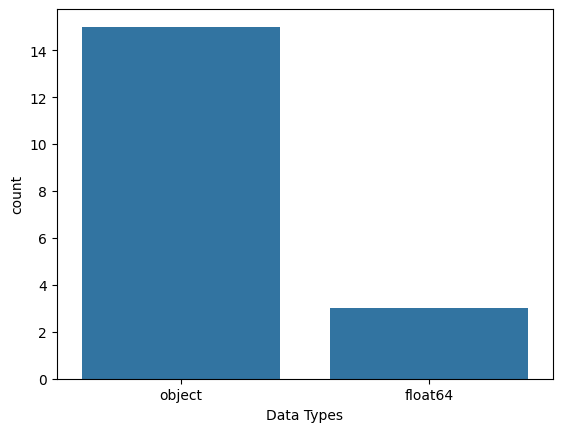

In [10]:
dtypes_df = pd.DataFrame(df.dtypes, columns=['Data Types'])

# Create a count plot
sns.countplot(x='Data Types', data=dtypes_df)
plt.show()

#### Statistical Interpretation

In [11]:
df.describe()

,Sexual Activity (scale of 10),Concentration (scale of 10),Optimisim (scale of 10)
count,120.000000,120.000000,120.000000
mean,4.741667,4.250000,4.466667
std,2.010459,1.797524,1.991298
min,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000
50%,5.000000,4.000000,4.000000
75%,6.000000,5.000000,6.000000
max,9.000000,8.000000,9.000000


#####   Sexual Activity (scale of 10): well we find that the median is 5 and (min,max) ranges from (1,9)

#####    Concentration (scale of 10) : well we find that the median is 4 and (min,max) ranges from (1,8)

#####    Optimisim (scale of 10) : well we find that the median is 4 and (min,max) ranges from (1,9)

### Explolatory Data Analysis

##### (A) Univariate analysis

Text(0.5, 1.0, 'Suicidal thoughts Distribution')

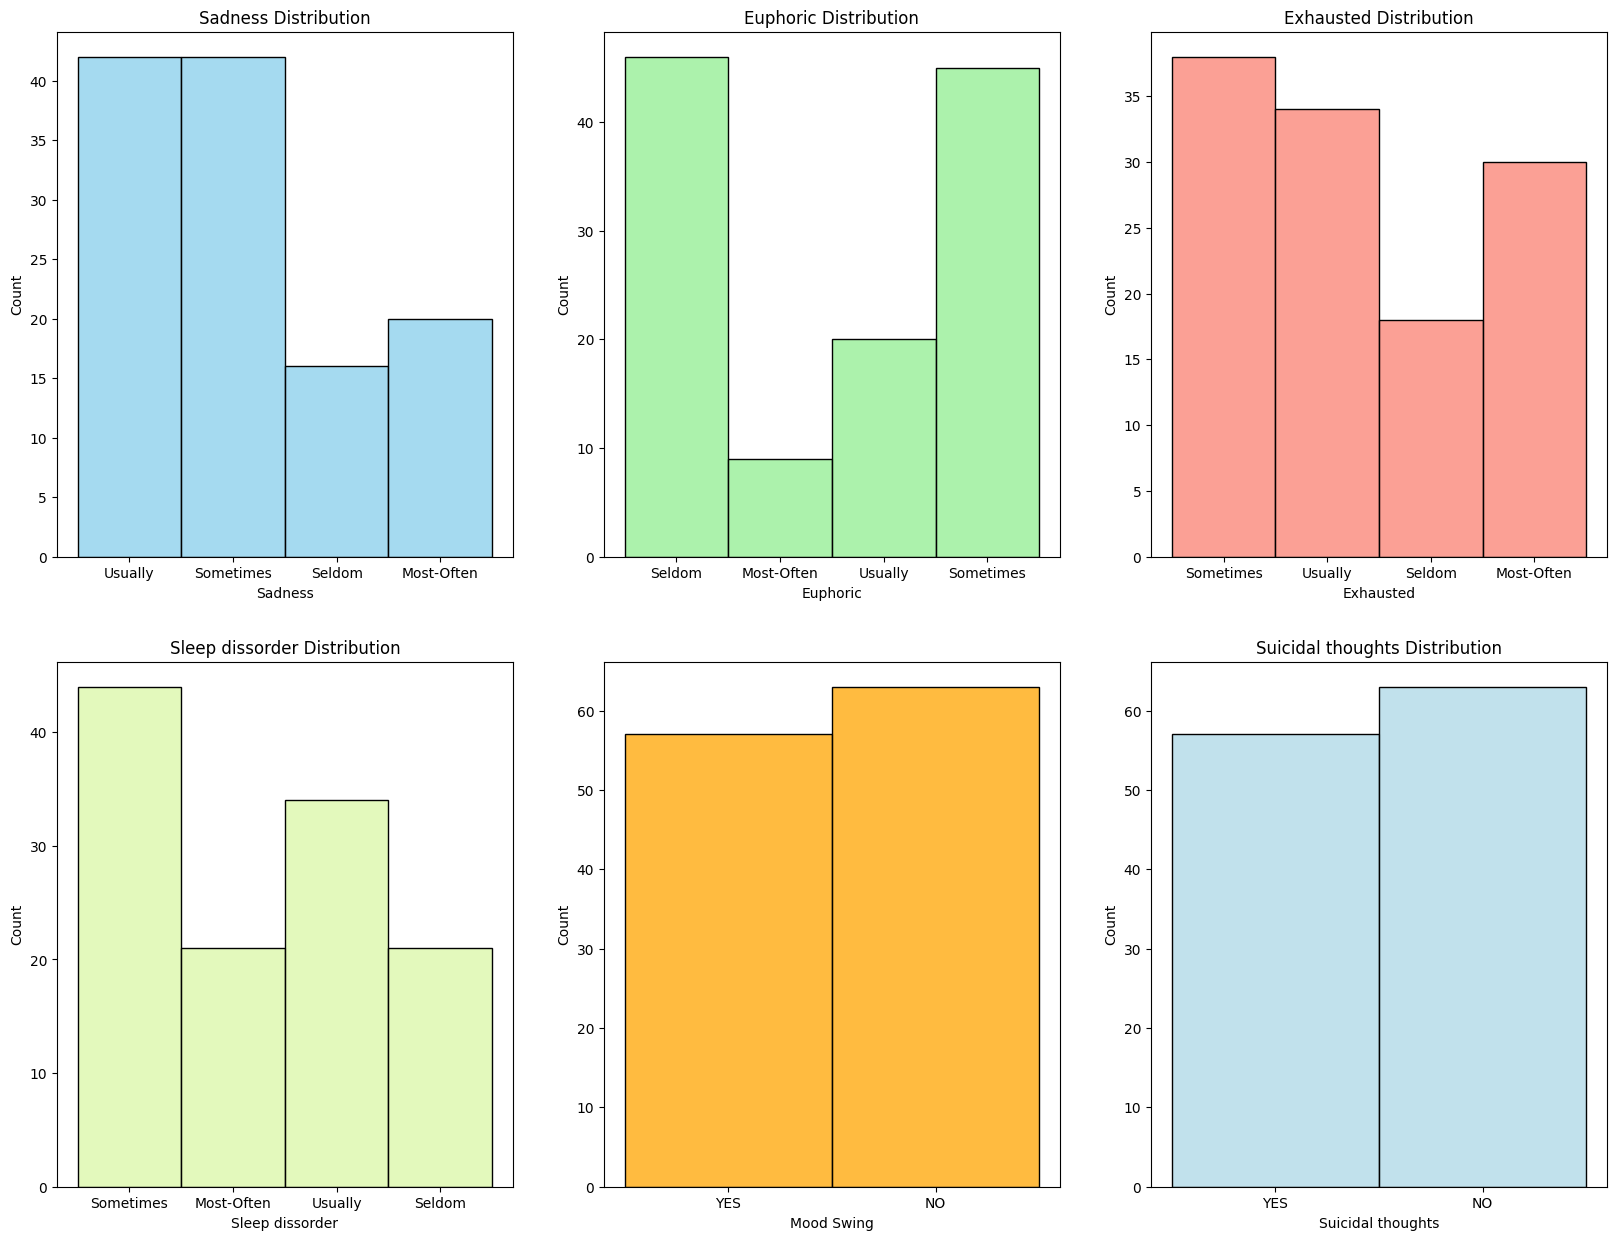

In [28]:
# Creating the subplots
fig, axes = plt.subplots(2, 3, figsize=(20, 15))  # 1 row, 3 columns

# Plotting each emotion
sns.histplot(df['Sadness'], bins=20, kde=False, ax=axes[0,0], color='skyblue')
axes[0,0].set_title('Sadness Distribution')

sns.histplot(df['Euphoric'], bins=20, kde=False, ax=axes[0,1], color='lightgreen')
axes[0,1].set_title('Euphoric Distribution')

sns.histplot(df['Exhausted'], bins=20, kde=False, ax=axes[0,2], color='salmon')
axes[0,2].set_title('Exhausted Distribution')

sns.histplot(df['Sleep dissorder'], bins=20, kde=False, ax=axes[1,0], color='#DAF7A6')
axes[1,0].set_title('Sleep dissorder Distribution')

sns.histplot(df['Mood Swing'], bins=20, kde=False, ax=axes[1,1], color='orange')
axes[1,2].set_title('Mood Swing Distribution')

sns.histplot(df['Suicidal thoughts'], bins=20, kde=False, ax=axes[1,2], color='lightblue')
axes[1,2].set_title('Suicidal thoughts Distribution')


In [13]:
colors_anorexia = ['skyblue', 'lightgreen']
colors_aggressive = ['salmon', 'orange']
colors_breakdown = ['purple', 'gold']
colors_admit = ['lightcoral', 'lightskyblue']

Text(0.5, 1.0, 'Distribution of Admit Mistakes')

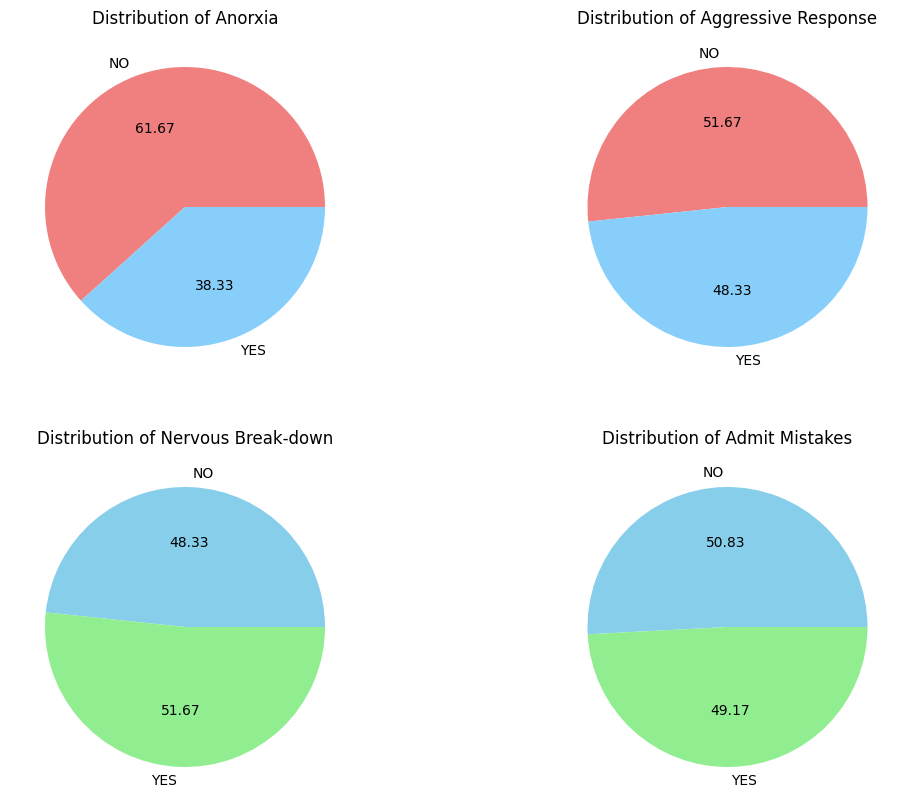

In [14]:


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
plt.subplots_adjust(wspace=0.4)

df.groupby('Anorxia').size().plot(kind='pie', autopct='%.2f', ax=axes[0, 0],colors = colors_admit)
axes[0, 0].set_title('Distribution of Anorxia')

df.groupby('Aggressive Response').size().plot(kind='pie', autopct='%.2f', ax=axes[0, 1],colors = colors_admit)
axes[0, 1].set_title('Distribution of Aggressive Response')

df.groupby('Nervous Break-down').size().plot(kind='pie', autopct='%.2f', ax=axes[1, 0],colors = colors_anorexia)
axes[1, 0].set_title('Distribution of Nervous Break-down')

df.groupby('Admit Mistakes').size().plot(kind='pie', autopct='%.2f', ax=axes[1, 1],colors = colors_anorexia)
axes[1, 1].set_title('Distribution of Admit Mistakes')

In [15]:
# sns.kdeplot(data=df, fill=True, common_norm=False, alpha=0.5)
# plt.xlabel('Scale of 10')
# plt.ylabel('Density')
# plt.title('Density Plot of Sexual Activity, Concentration, and Optimism')
# plt.legend(labels=['Sexual Activity', 'Concentration', 'Optimism'])
# plt.show()

In [16]:
# fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))

# cols = ['Sexual Activity (scale of 10)','Concentration (scale of 10)','Optimisim (scale of 10)']
# # Create density plots for each variable
# for i, column in enumerate(cols):
#     sns.kdeplot(data=df[column], fill=True, common_norm=False, alpha=0.5, ax=axes[i])
#     axes[i].set_title(f'Density Plot of {column}')
#     axes[i].set_xlabel('Scale of 10')
#     axes[i].set_ylabel('Density')

# plt.tight_layout()
# plt.show()

##### This graph represents the density of different of categories, the density of its peak     

<Axes: title={'center': 'Distribution of Diagnosis'}>

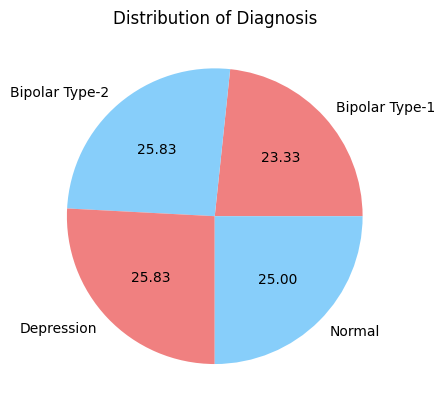

In [17]:
plt.title("Distribution of Diagnosis")
df.groupby('Expert Diagnose').size().plot(kind='pie', autopct='%.2f',colors = colors_admit)


##### Counts of different diagnose

In [27]:
df['Suicidal thoughts'] = df['Suicidal thoughts'].str.replace(' ', '')
distinct_counts = df['Suicidal thoughts'].value_counts()
print(distinct_counts)

Suicidal thoughts
NO     63
YES    57
Name: count, dtype: int64


In [19]:
for col in df.columns:
    print(col)

Sadness
Euphoric
Exhausted
Sleep dissorder
Mood Swing
Suicidal thoughts
Anorxia
Authority Respect
Try-Explanation
Aggressive Response
Ignore & Move-On
Nervous Break-down
Admit Mistakes
Overthinking
Sexual Activity (scale of 10)
Concentration (scale of 10)
Optimisim (scale of 10)
Expert Diagnose


##### (B) Bivariate analysis

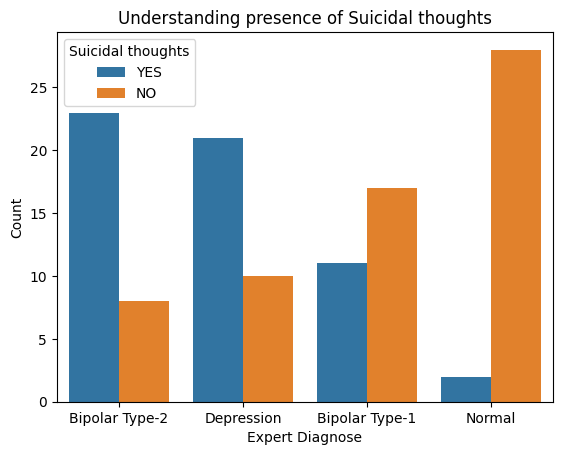

In [31]:
sns.countplot(x='Expert Diagnose', hue='Suicidal thoughts', data=df)
plt.title('Understanding presence of Suicidal thoughts')
plt.xlabel('Expert Diagnose')
plt.ylabel('Count')
plt.show()

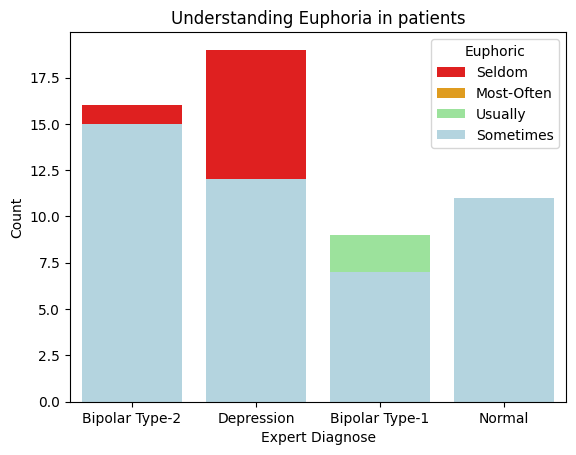

In [36]:
custom_palette = {'Sometimes': 'lightblue', 'Usually': 'lightgreen', 'Seldom': 'red','Most-Often':'orange'}
sns.countplot(x='Expert Diagnose', hue='Euphoric', data=df,dodge=False,palette=custom_palette)
plt.title('Understanding Euphoria in patients')
plt.xlabel('Expert Diagnose')
plt.ylabel('Count')
plt.show()

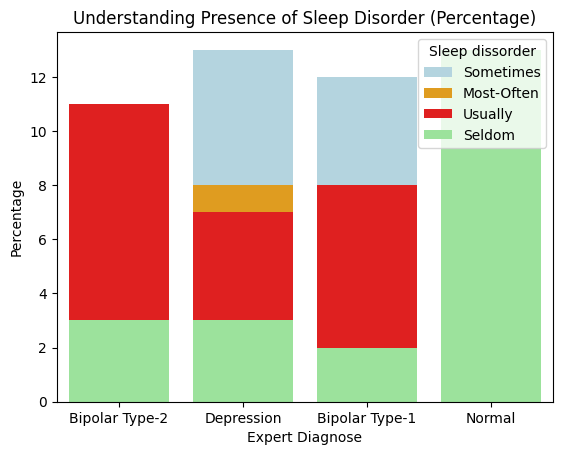

In [50]:
custom_palette_1 = {'Sometimes': 'lightblue', 'Usually': 'red', 'Seldom': 'lightgreen','Most-Often':'orange'}
ax = sns.countplot(x='Expert Diagnose', hue='Sleep dissorder', data=df, dodge=False,palette=custom_palette_1)
plt.title('Understanding Presence of Sleep Disorder (Percentage)')
plt.xlabel('Expert Diagnose')
plt.ylabel('Count')
plt.show()